## QN 1

In [1]:
import keras
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## i

In [2]:
# Loading dataset
(X, y), (X_te , y_te) = mnist.load_data()
X = np.reshape(X, [X.shape[0], X.shape[1]*X.shape[2]])
X = X.T

In [9]:
def PCA(X):
    
    # Mean Centering
    X_mean = X.mean(axis=1)
    X_center = np.empty((X.shape))
    for i in range(X.shape[1]):
        X_center[:,i] = X[:,i] - mean
        
    # Covariance matrix
    cov_data = np.cov(X_center)
    
    # Eigen decomposition of covariance matrix
    e_val, e_vec = np.linalg.eigh(cov_data)
    
    return e_vec,e_val

In [10]:
A,b = PCA(X)

(784,)


IndexError: index 784 is out of bounds for axis 0 with size 784

### Images of the principal components

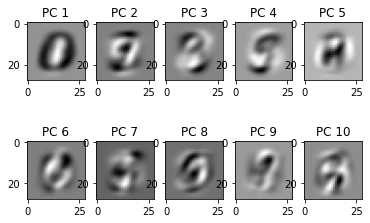

In [139]:
no_components = 10
for i in range(no_components):
    plt.subplot(2,5,i+1)
    plt.imshow(A[:,-1-i].reshape((28,28)),cmap='gray')
    plt.title('PC {}'.format(i+1))

### Variance explained by the principal components

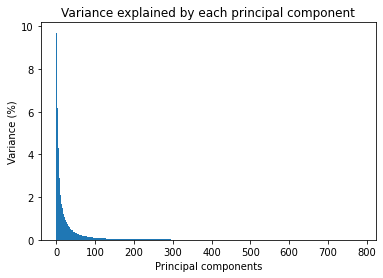

In [290]:
x = np.arange(0,784,1)
var_per = [b[i]*100/b.sum() for i in range(b.shape[0]-1,-1,-1)]
plt.bar(x,var_per,width=2)
plt.xlabel('Principal components')
plt.ylabel('Variance (%)')
plt.title('Variance explained by each principal component')
plt.show()

## ii

In [96]:
sum_var = 0
for i in range(b.shape[0]):
    sum_var += var_per[i]
    if sum_var>=95:
        print('{} components explain 95 percent of the dataset'.format(i+1))
        break

154 components explain 95 percent of the dataset


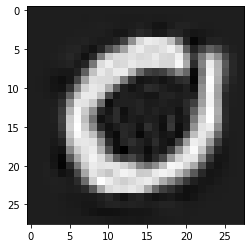

In [292]:
# Choosing d = 154 to reconstruct the dataset

j = 121 # vary the value of j to get compressed form of any data point
d = 154
red_data = np.zeros((784,1))
for i in range(d):
    proxy = X[:,j].T@A[:,783-i]
    red_data = np.add(red_data,proxy*np.array(A[:,783-i].reshape(784,1)))
plt.imshow(red_data.reshape((28,28)),cmap='gray')
plt.show()

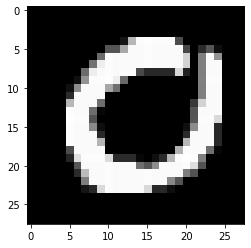

In [293]:
plt.imshow(X[:,j].reshape((28,28)),cmap='gray')

## iii

In [275]:
def kernel_poly(xi,xj,d):
    return (1+xi.T@xj)**d

def kernel_rbf(xi,xj,sigma):
    return np.exp(-((np.linalg.norm(xi-xj)**2)/(2*sigma**2)))

def get_kernel_comps(X,kernel='poly',d=2,sigma=0.2,num_components=2):
    
    n = 1000
    one_N = np.ones((n,n))/n
    K = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            x_i = X[:,i]/np.linalg.norm(X[:,i])
            x_j = X[:,j]/np.linalg.norm(X[:,j])
            if kernel == 'poly':
                K[i,j] = kernel_poly(x_i,x_j,d)
            if kernel == 'rbf':
                K[i,j] = kernel_rbf(x_i,x_j,sigma)

    K_center = K - one_N@K - K@one_N + one_N@K@one_N
    w,V = np.linalg.eigh(K_center)
    w = w[::-1]
    V = V[:,::-1]
    var = np.sum(np.abs(w)[:num_components])/np.sum(np.abs(w))
    alphak = V/((np.abs(w))**0.5)
    alphak = alphak[:,:num_components]
    kernel_comps = np.matmul(K_center.T,alphak).T

    return kernel_comps,var


In [284]:
def show_kernel_pca(X,kernel='poly',d=2,sigma=0.2,num_components=2):
    kernel_comps,k = get_kernel_comps(X,kernel,d,sigma,num_components)
    plt.scatter(kernel_comps[0],kernel_comps[1],c=y[:1000])
    plt.xlabel('1st principal component')
    plt.ylabel('2nd principal component')
    if kernel=='poly':
        plt.title(f'Polynomial kernel with d = {d}')
    if kernel=='rbf':
        plt.title(f'RBF kernel with sigma = {round(sigma,1)}')
    plt.show()
    print(f'Variance = {k}')

## Polynomial kernel

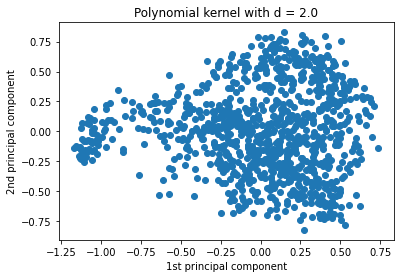

Variance = 0.14669882221835975


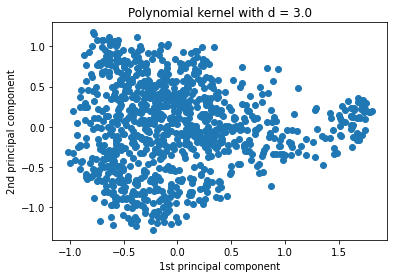

Variance = 0.1253734440769472


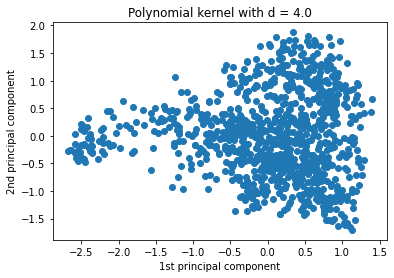

Variance = 0.10736636559231202


In [285]:
deg = np.linspace(2,4,3)
for de in deg:
    show_kernel_pca(X,kernel='poly',d=de)

## RBF kernel

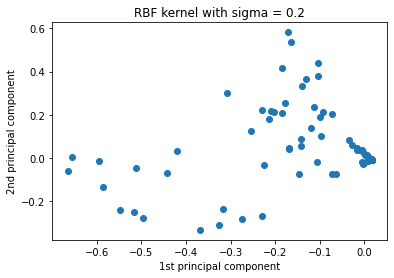

Variance = 0.007136031230440489


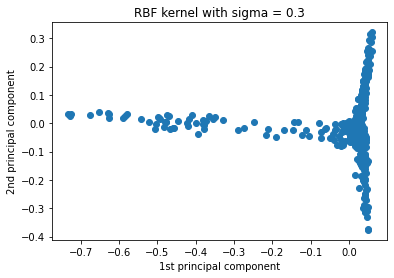

Variance = 0.01833060253202015


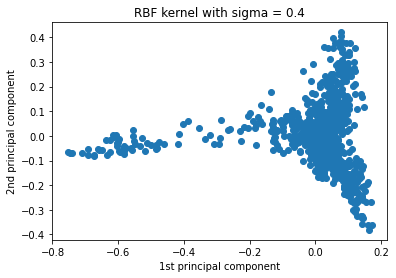

Variance = 0.03864588043010357


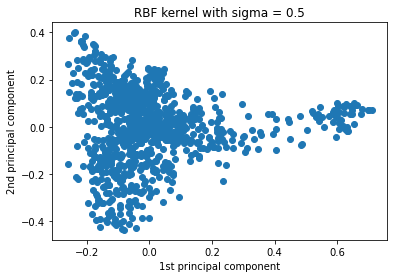

Variance = 0.06285691544998256


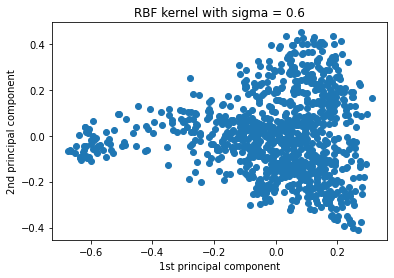

Variance = 0.0848118402889692


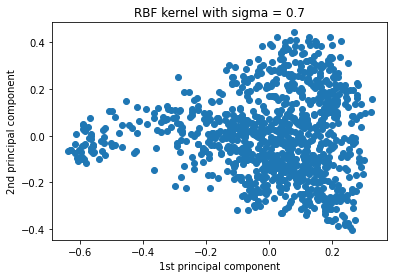

Variance = 0.10226373040822141


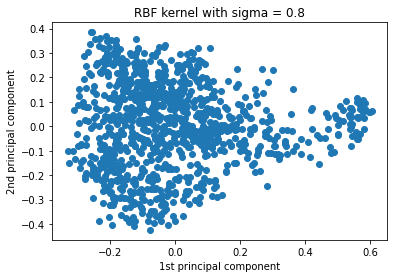

Variance = 0.11558660987308433


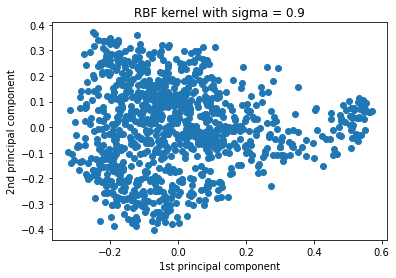

Variance = 0.12571229565555053


In [286]:
sig = np.arange(0.2,1,0.1)
for s in sig:
    show_kernel_pca(X,kernel='rbf',sigma=s)

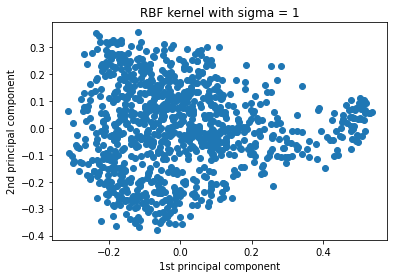

Variance = 0.1334766735820034


In [287]:
show_kernel_pca(X,kernel='rbf',sigma=1)

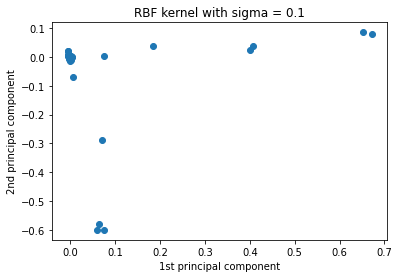

Variance = 0.00244257306320923


In [294]:
show_kernel_pca(X,kernel='rbf',sigma=0.1)